The **Central Limit Theorem** states that the distribution of sample means $\bar{x}$ is approximately normal as the sample size $n$ increases regardless of the actual population distribution. This is an important idea since it allows us to use the normal distribution when making probabilistic statements about a population that might not necessarily follow a normal distribution.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import plots

In [83]:
figsize=(4*2.3,4)

# Sampling Distribution of Exponential Population

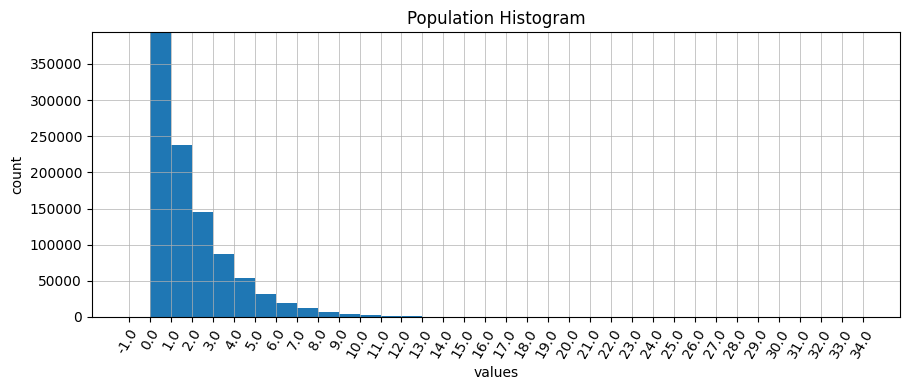

In [84]:
# Exponential Population
N = int(1e6)
population = np.random.exponential(scale=2, size=N)
mu = np.mean(population)
sigma = np.std(population, ddof=0)
df_pop = pd.DataFrame(data=population, columns=["values"])

vals, bins = plots.histogram(df_pop,  bin_width=1, figsize=figsize, title="Population Histogram", xlabel=["values"], ylabel=["count"], xticklabelrotation=60,)

# Creating the sampling distribution
n = 30
n_samp = int(N / 10)
x_bars = []
for _ in range(n_samp):
    x = np.random.choice(population, size=n)
    x_bars.append(np.mean(x))
df_samp_dist = pd.DataFrame(data=x_bars, columns=["x_bar"])
mean_samp_dist = round(np.mean(x_bars), 2)
std_samp_dist = round(np.std(x_bars, ddof=0), 2)

(<Figure size 920x400 with 2 Axes>, <Axes: >)

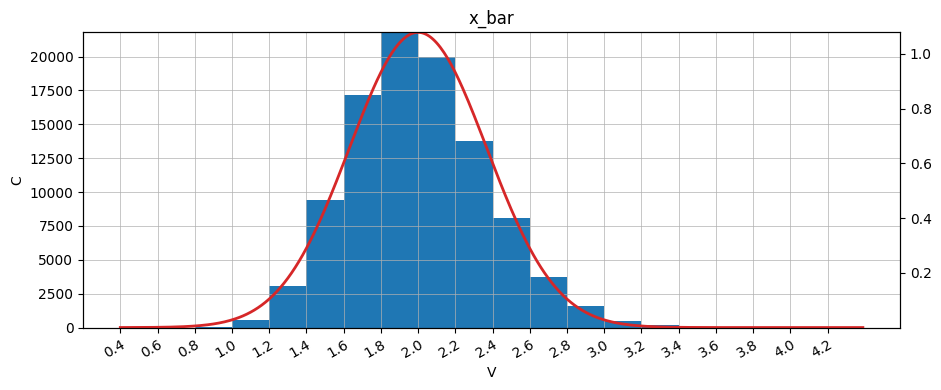

In [85]:
# Plot of sampling distribution
bins = np.arange(0.4, 4.4, 0.2)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(1, 1, 1)
_, _ = plots.histogram(df=df_samp_dist, bins=bins, ylabel="Counts", xlabel="Value",fig=fig, ax=ax)

# Plot of probability density function of sampling distribution
x = np.arange(0.4, 4.4, 0.01)
pdf = stats.norm.pdf(x, loc=mean_samp_dist, scale=std_samp_dist)
ax = ax.twinx()
plots.scatter(x, pdf, fig=fig, ax=ax, ylim=(pdf.min(), pdf.max()), title="",markersize=0,linewidth=2,color=plots.RED)

# Sampling Distribution of a Multi-modal Distribution

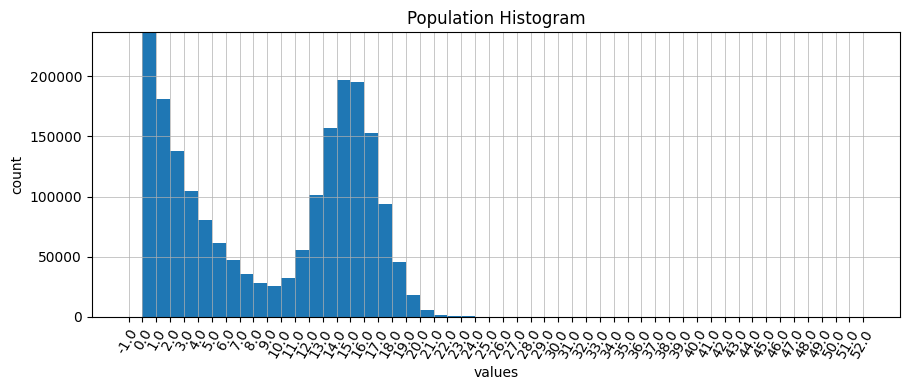

In [86]:
# Multi-modal Population
N = int(1e6)
population = np.append(np.random.exponential(scale=3.7, size=N), np.random.normal(loc=15, scale=2, size=N))
mu = np.mean(population)
sigma = np.std(population, ddof=0)
df_pop = pd.DataFrame(data=population, columns=["values"])

vals, bins = plots.histogram(df_pop,  bin_width=1, figsize=figsize, title="Population Histogram", xlabel=["values"], ylabel=["count"], xticklabelrotation=60,)

# Creating the sampling distribution
n = 30
n_samp = int(N / 10)
x_bars = []
for _ in range(n_samp):
    x = np.random.choice(population, size=n)
    x_bars.append(np.mean(x))
df_samp_dist = pd.DataFrame(data=x_bars, columns=["x_bar"])
mean_samp_dist = round(np.mean(x_bars), 2)
std_samp_dist = round(np.std(x_bars, ddof=0), 2)

(<Figure size 920x400 with 2 Axes>, <Axes: >)

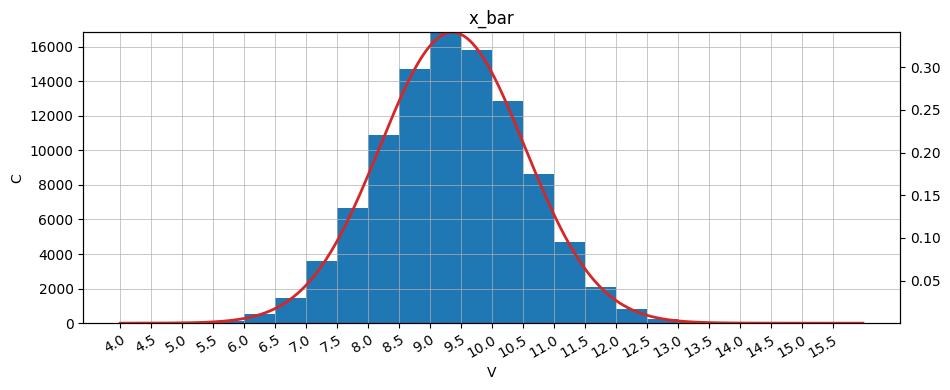

In [87]:
# Plot of sampling distribution
# bins = np.arange(0.4, 4.4, 0.2)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(1, 1, 1)
bins = np.arange(4,16,0.5)
_, _ = plots.histogram(df=df_samp_dist, bins=bins, ylabel="Counts", xlabel="Value",fig=fig, ax=ax)

# Plot of probability density function of sampling distribution
x = np.arange(4, 16, 0.01)
pdf = stats.norm.pdf(x, loc=mean_samp_dist, scale=std_samp_dist)
ax = ax.twinx()
plots.scatter(x, pdf, fig=fig, ax=ax, ylim=(pdf.min(), pdf.max()), title="",markersize=0,linewidth=2,color=plots.RED)

Note that in both cases, the population distribution is not at all normal. But with a sample size $n = 30$, we can expect sample means to have a normal distribution.